# Formula 1 Analysis

In this notebook, we will try various analyses with F1 Data from Kaggle - [Formula 1 World Championship 1950 - 2023 Dataset](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)



In [1]:
import warnings

# Import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# ignore random API warnings
warnings.simplefilter("ignore")

## Track Prediction with Pitstops


In [35]:
races_df = pd.read_csv('data/races.csv')
print("Races")
display(races_df)
display(races_df.describe().T)

Races


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


,count,mean,std,min,25%,50%,75%,max
raceId,1102.0,553.853902,321.706151,1.0,276.25,551.5,826.75,1120.0
year,1102.0,1992.049002,20.308639,1950.0,1976.00,1994.0,2010.00,2023.0
round,1102.0,8.507260,5.097545,1.0,4.00,8.0,12.00,23.0
circuitId,1102.0,23.697822,19.337398,1.0,9.00,18.0,34.00,80.0


In [36]:
# Load and review Race detail information
pit_stops_df = pd.read_csv("data/pit_stops.csv")
print("Pit Stops")
display(pit_stops_df)
display(pit_stops_df.describe().T)

Pit Stops


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


,count,mean,std,min,25%,50%,75%,max
raceId,9634.0,956.103384,76.862933,841.0,885.00,953.0,1024.00,1096.0
driverId,9634.0,513.030828,391.682304,1.0,18.00,815.0,830.00,856.0
stop,9634.0,1.760536,0.914522,1.0,1.00,2.0,2.00,6.0
lap,9634.0,25.255553,14.579838,1.0,13.00,25.0,36.00,78.0
milliseconds,9634.0,72401.730641,273833.956873,12897.0,21908.25,23557.0,26186.75,3069017.0


In [98]:
pits_year_df = pd.merge(pit_stops_df,
                        races_df[['raceId','year','circuitId']],
                        on = 'raceId')
pits_year_df

,raceId,driverId,stop,lap,time,duration,milliseconds,year,circuitId
0,841,153,1,1,17:05:23,26.898,26898,2011,1
1,841,30,1,1,17:05:52,25.021,25021,2011,1
2,841,17,1,11,17:20:48,23.426,23426,2011,1
3,841,4,1,12,17:22:34,23.251,23251,2011,1
4,841,13,1,13,17:24:10,23.842,23842,2011,1
...,...,...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174,2022,24
9630,1096,840,2,40,18:04:44,21.802,21802,2022,24
9631,1096,839,2,41,18:06:09,21.734,21734,2022,24
9632,1096,846,2,42,18:07:36,21.559,21559,2022,24


### 2022

Let's look at just 2022 - This was just a test.  We actually did the full list below.

In [74]:
yr_df = pits_year_df[pits_year_df['year']==2022]
# of races in 2022
print("No. of Races:", len(yr_df.raceId.unique()))

No. of Races: 22


In [99]:
yr_df = pits_year_df
print("No. of Races:", len(yr_df.raceId.unique()))

No. of Races: 239


In [100]:
yr_df.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
year             int64
circuitId        int64
dtype: object

In [101]:
convert = ['duration']
for item in convert:
    yr_df[item] = pd.to_numeric(yr_df[item],
                                errors="coerce")

display(yr_df.dtypes)
yr_dfy

raceId            int64
driverId          int64
stop              int64
lap               int64
time             object
duration        float64
milliseconds      int64
year              int64
circuitId         int64
dtype: object

,raceId,driverId,stop,lap,time,duration,milliseconds,year,circuitId
0,841,153,1,1,17:05:23,26.898,26898,2011,1
1,841,30,1,1,17:05:52,25.021,25021,2011,1
2,841,17,1,11,17:20:48,23.426,23426,2011,1
3,841,4,1,12,17:22:34,23.251,23251,2011,1
4,841,13,1,13,17:24:10,23.842,23842,2011,1
...,...,...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174,2022,24
9630,1096,840,2,40,18:04:44,21.802,21802,2022,24
9631,1096,839,2,41,18:06:09,21.734,21734,2022,24
9632,1096,846,2,42,18:07:36,21.559,21559,2022,24


In [102]:
def time_to_seconds(t):
    """
    Returns time from midnight
    :param t: Time String formatted as HH:MM:SS
    :return: seconds
    """
    hours, minutes, seconds = map(int, t.split(':'))
    return hours * 3600 + minutes * 60 + seconds

# Apply the function to the 'time' column
yr_df['time'] = yr_df['time'].apply(time_to_seconds)

In [103]:
yr_df

,raceId,driverId,stop,lap,time,duration,milliseconds,year,circuitId
0,841,153,1,1,61523,26.898,26898,2011,1
1,841,30,1,1,61552,25.021,25021,2011,1
2,841,17,1,11,62448,23.426,23426,2011,1
3,841,4,1,12,62554,23.251,23251,2011,1
4,841,13,1,13,62650,23.842,23842,2011,1
...,...,...,...,...,...,...,...,...,...
9629,1096,849,2,38,64970,25.174,25174,2022,24
9630,1096,840,2,40,65084,21.802,21802,2022,24
9631,1096,839,2,41,65169,21.734,21734,2022,24
9632,1096,846,2,42,65256,21.559,21559,2022,24


In [94]:
yr_df.isna().sum()

raceId            0
driverId          0
stop              0
lap               0
time              0
duration        358
milliseconds      0
year              0
circuitId         0
dtype: int64

<Axes: >

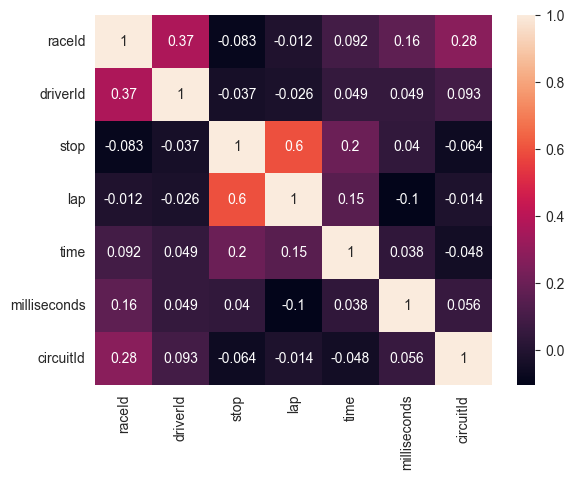

In [104]:
yr_df = yr_df.drop(['duration','year'],axis=1)
sns.heatmap(yr_df.corr(),annot=True)

In [105]:
# Lets create our training data sets
X = yr_df.drop(columns=['circuitId']).values
y = yr_df['circuitId']

# ML Algorithms

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [107]:
# Create our train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
stdsc = StandardScaler().fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

In [108]:
# classification ML algorithms
lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [109]:
models = [lr,sgd,knn,gb,rn,dt]
for m in models:
    m.fit(X_train_std,y_train)
    y_pred = m.predict(X_test_std)
    print(m,":",accuracy_score(y_pred,y_test)*100)

LogisticRegression(solver='sag') : 30.877010897768553
SGDClassifier() : 15.516346652828231
KNeighborsClassifier() : 58.1733264141152
GaussianNB() : 29.216398546964196
RandomForestClassifier() : 83.44577062791905
DecisionTreeClassifier() : 87.8048780487805


In [111]:
rn_pred = rn.predict(X_test_std)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.84      0.84      0.84        64
           2       0.91      0.93      0.92        91
           3       0.97      0.96      0.97       131
           4       0.83      0.88      0.85       110
           5       0.78      0.67      0.72        27
           6       0.79      0.74      0.76        70
           7       0.84      0.86      0.85        65
           9       0.85      0.89      0.87        99
          10       0.79      0.87      0.83        53
          11       0.85      0.89      0.87       105
          12       1.00      0.87      0.93        23
          13       0.85      0.86      0.86        86
          14       0.77      0.75      0.76        85
          15       1.00      1.00      1.00        95
          17       0.90      0.89      0.90        84
          18       0.88      0.91      0.89       118
          20       0.96      1.00      0.98        27
          21       1.00    